In [1]:
!pip install vega==1.3

     |████████████████████████████████| 1.5MB 3.4MB/s 
  Created wheel for vega: filename=vega-1.3.0-cp36-none-any.whl size=2873879 sha256=38726b24277bdaed08d8a19666731f1aa0fa379a6beee0df566ff645b8871d02
  Stored in directory: /root/.cache/pip/wheels/76/7a/85/a796b8ff2157b97269059083b96d686ec51ef81924035fc227
Successfully built vega


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
df_path = "drive/My Drive/Colab Notebooks/articledataset3.csv"
df = pd.read_csv(df_path, sep=',')

In [4]:
df.head()

,Title,Article,Category
0,title,It's more important than ever that organizatio...,Advertising\n
1,title,Native advertising: The refreshing and unobtru...,Advertising\n
2,title,There’s so much to learn with social media adv...,Advertising\n
3,title,How big is your social media budget? I’ve hear...,Advertising\n
4,title,Q: I've never really done much advertising for...,Advertising\n


**Number of articles in each category**

In [5]:
bars = alt.Chart(df).mark_bar(size=50).encode(
    x=alt.X("Category"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of articles')),
    tooltip=[alt.Tooltip('count()', title='Number of articles'), 'Category'],
    color='Category'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=1200,
    title = "Number of articles in each category",
)

Output hidden; open in https://colab.research.google.com to view.

In [6]:
df['id'] = 1
df2 = pd.DataFrame(df.groupby('Category').count()['id']).reset_index()

bars = alt.Chart(df2).mark_bar(size=50).encode(
    x=alt.X('Category'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Articles')),
    color='Category'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=1200,
    title = "% of articles in each category",
)

alt.LayerChart(...)

**Article length by category**

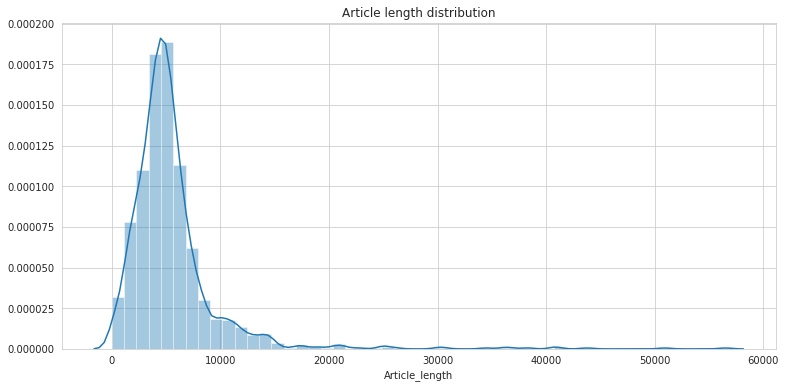

In [7]:
df['Article_length'] = df['Article'].str.len()

plt.figure(figsize=(12.8,6))
sns.distplot(df['Article_length']).set_title('Article length distribution');

**Removing from 95% onwards for a better view**

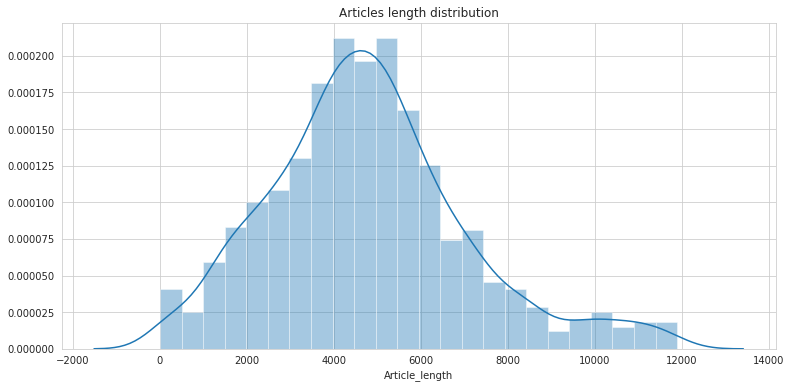

In [8]:
quantile_95 = df['Article_length'].quantile(0.95)
df_95 = df[df['Article_length'] < quantile_95]
plt.figure(figsize=(12.8,6))
sns.distplot(df_95['Article_length']).set_title('Articles length distribution');

**Boxplot figure of data**

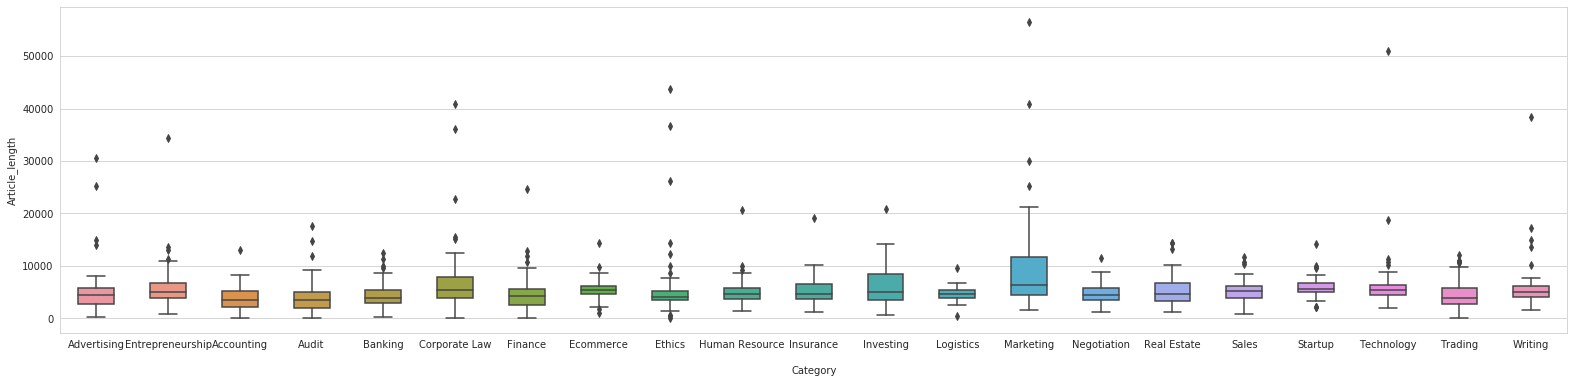

In [9]:
plt.figure(figsize=(27,6))
sns.boxplot(data=df, x='Category', y='Article_length', width=.5);

We can see that, although the length distribution is different for every category, the difference is not too big. If we had way too different lengths between categories we would have a problem since the feature creation process may take into account counts of words. However, when creating the features with TF-IDF scoring, we will normalize the features just to avoid this.


In [0]:
with open('drive/My Drive/Colab Notebooks/article_dataset3.pickle', 'wb') as output:
    pickle.dump(df, output)